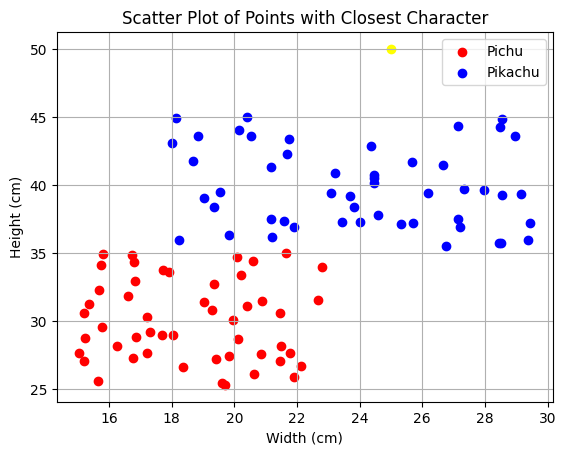

In [1]:
import matplotlib.pyplot as plt
pichu_text = "../data/pichu(1).txt"
pichu_x = []
pichu_y = []
with open(pichu_text, "r") as file:
    next(file)
    for line in file:
        values = line.strip("()\n").split(",")
        x = float(values[0])
        y = float(values[1])
        pichu_x.append(x)
        pichu_y.append(y)
        



pikachu_text = "../data/pikachu.txt"
pikachu_x = []
pikachu_y = []
with open(pikachu_text, "r") as file:
    next(file)
    for line in file:
        values = line.strip("()\n").split(",")
        x = float(values[0])
        y = float(values[1])
        pikachu_x.append(x)
        pikachu_y.append(y)





# Function for calculating the distance
def distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

# Function for calculating closest to the given value
def closest_character(point, pichu_points, pikachu_points):
    min_distance_pichu = min(distance(point, (x, y)) for x, y in zip(pichu_points[0], pichu_points[1]))
    min_distance_pikachu = min(distance(point, (x, y)) for x, y in zip(pikachu_points[0], pikachu_points[1]))
    
    if min_distance_pichu < min_distance_pikachu:
        return "Pichu"
    else:
        return "Pikachu"


points = []


while True:
    width = input("Ange bredden för punkten (cm): ")
    height = input("Ange höjden för punkten (cm): ")
    try:
        width = float(width)
        height = float(height)
        points.append((width, height))
        break
    except ValueError:
        print("Felaktig inmatning. Försök igen eller avsluta med 'q'.")
        


character_list = [closest_character(point, (pichu_x, pichu_y), (pikachu_x, pikachu_y)) for point in points]


color_list = ['red' if character == 'Pichu' else 'blue' for character in character_list]


plt.scatter([point[0] for point in points], [point[1] for point in points], color=color_list, marker='o')
plt.scatter(pichu_x, pichu_y, color="red", label="Pichu")
plt.scatter(pikachu_x, pikachu_y, color="blue", label="Pikachu")
plt.title("Scatter Plot of Points with Closest Character")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.legend()
plt.grid(True)
plt.show()
       








In [57]:


test_points = "../data/test_points.txt"

points_list = []
with open(test_points, "r") as test_point:
    for line in test_point:
        # Dela strängen vid kommatecken och rensa bort parenteser och mellanslag
        point_values = line.strip().replace("(", "").replace(")", "").split(",")
        
        # Konvertera varje nummerpar till float och skapa tupler av dem
        point_pairs = [(float(point_values[i]), float(point_values[i+1])) for i in range(0, len(point_values), 2)]
        
        # Lägg till nummerparen till points_list
        points_list.extend(point_pairs)

print(points_list)

[(25.0, 35.0), (15.0, 14.0), (26.0, 30.0), (22.0, 45.0)]
